# Project 1
## Mohammed Rahman

NYC has a new initiative called Vision Zero. Its mission is to make New York City the world’s safest big city. One of the leading causes of injury-related death in New York City is being struck by a vehicle. Traffic related fatalities have decreased from 1990 - to 2011, from 701 to 249, respectively.

One of Vision Zero’s initiates is the decrease in speed limits. Unless otherwise posted, the speed limit is 25MPH. The speed limit change was introduced  in2014. In this data analysisIwe'll look at a subset from 201t.

The data is collected from NYC Open Data, more specificity the NYC NYPD Database, which can be found here: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nxI. We decided to look atcent data - for 2019.

## Libraries

Loading the necessary libraries to perform network analysis.

In [3]:
import networkx as nx
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import stats
import pandas as pd
import scipy.stats as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
accidents = pd.read_csv("https://raw.githubusercontent.com/mrahman234/Data-620/main/Project%201/NYPD_Motor_Vehicle_Collisions_Crashes_2019.csv")
accidents.head(15)

,DATE,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTINGFACTOR,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1
0,9/1/2019,NaN,NaN,NaN,NaN,NASSAU EXPRESSWAY,NaN,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4198311,Sedan
1,9/1/2019,NaN,40.673676,-73.865760,POINT (-73.86576 40.673676),SUTTER AVENUE,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN,4199346,Sedan
2,9/1/2019,NaN,40.874600,-73.909700,POINT (-73.9097 40.8746),BROADWAY,NaN,NaN,Pavement Defective,NaN,NaN,NaN,NaN,4197802,Sedan
3,9/1/2019,NaN,NaN,NaN,NaN,GRAND CENTRAL PARKWAY,UNION TURNPIKE,NaN,Unspecified,NaN,NaN,NaN,NaN,4199721,Motorcycle
4,9/1/2019,BROOKLYN,40.665245,-73.875130,POINT (-73.87513 40.665245),LINDEN BOULEVARD,ATKINS AVENUE,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,4199339,Sedan
5,9/1/2019,BRONX,NaN,NaN,NaN,EAST FORDHAM ROAD,BELMONT AVENUE,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4199427,Station Wagon/Sport Utility Vehicle
6,9/1/2019,STATEN ISLAND,40.552320,-74.190956,POINT (-74.190956 40.55232),NaN,NaN,260 ARDEN AVENUE,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4198162,Station Wagon/Sport Utility Vehicle
7,9/1/2019,NaN,40.749150,-73.988280,POINT (-73.98828 40.74915),AVENUE OF THE AMERICAS,NaN,NaN,Traffic Control Disregarded,NaN,NaN,NaN,NaN,4201656,Taxi
8,9/1/2019,BRONX,40.873394,-73.906710,POINT (-73.90671 40.873394),WEST 225 STREET,EXTERIOR STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4198003,Sedan
9,9/1/2019,BRONX,40.853024,-73.884070,POINT (-73.88407 40.853024),NaN,NaN,2358 CROTONA AVENUE,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4197979,Sedan


## Data Wrangling

Now transforming data, here created a new location variable and set it to On street name.

In [15]:
locations = accidents.ON_STREET_NAME.unique()
locations = pd.DataFrame(locations,columns=['ON_STREET_NAME'])
locations['ID'] = range(7000000,7000000+len(locations))
locations

,ON_STREET_NAME,ID
0,NASSAU EXPRESSWAY,7000000
1,SUTTER AVENUE,7000001
2,BROADWAY,7000002
3,GRAND CENTRAL PARKWAY,7000003
4,LINDEN BOULEVARD,7000004
...,...,...
288,SOUTH CONDUIT AVENUE,7000288
289,154 STREET,7000289
290,EVELYN PLACE,7000290
291,QUEENS BOULEVARD,7000291


Now, merging the locations and accidents dataset together on the "on_street_name" column.

In [17]:
n = accidents.loc[:,['COLLISION_ID', 'ON_STREET_NAME', 'CONTRIBUTINGFACTOR', 'VEHICLE TYPE CODE 1', 'LOCATION']]
t = pd.merge(n, locations, on="ON_STREET_NAME")
t

,COLLISION_ID,ON_STREET_NAME,CONTRIBUTINGFACTOR,VEHICLE TYPE CODE 1,LOCATION,ID
0,4198311,NASSAU EXPRESSWAY,Driver Inattention/Distraction,Sedan,NaN,7000000
1,4199346,SUTTER AVENUE,Unspecified,Sedan,POINT (-73.86576 40.673676),7000001
2,4199361,SUTTER AVENUE,Passing or Lane Usage Improper,Station Wagon/Sport Utility Vehicle,POINT (-73.89987 40.668682),7000001
3,4197802,BROADWAY,Pavement Defective,Sedan,POINT (-73.9097 40.8746),7000002
4,4198430,BROADWAY,Unspecified,Bike,POINT (-73.92122 40.86769),7000002
...,...,...,...,...,...,...
594,4198499,SOUTH CONDUIT AVENUE,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle,POINT (-73.72986 40.665348),7000288
595,4198614,154 STREET,Backing Unsafely,Sedan,POINT (-73.811005 40.764706),7000289
596,4198530,EVELYN PLACE,Failure to Yield Right-of-Way,Sedan,POINT (-73.90534 40.859642),7000290
597,4198489,QUEENS BOULEVARD,Driver Inattention/Distraction,Taxi,POINT (-73.87767 40.73675),7000291


In [19]:
#create relation list between each case and the location of the occurrence
edgeList = t.loc[:,['COLLISION_ID', 'ID',  'CONTRIBUTINGFACTOR', 'LOCATION', 'ON_STREET_NAME']]

edgeList

,COLLISION_ID,ID,CONTRIBUTINGFACTOR,LOCATION,ON_STREET_NAME
0,4198311,7000000,Driver Inattention/Distraction,NaN,NASSAU EXPRESSWAY
1,4199346,7000001,Unspecified,POINT (-73.86576 40.673676),SUTTER AVENUE
2,4199361,7000001,Passing or Lane Usage Improper,POINT (-73.89987 40.668682),SUTTER AVENUE
3,4197802,7000002,Pavement Defective,POINT (-73.9097 40.8746),BROADWAY
4,4198430,7000002,Unspecified,POINT (-73.92122 40.86769),BROADWAY
...,...,...,...,...,...
594,4198499,7000288,Failure to Yield Right-of-Way,POINT (-73.72986 40.665348),SOUTH CONDUIT AVENUE
595,4198614,7000289,Backing Unsafely,POINT (-73.811005 40.764706),154 STREET
596,4198530,7000290,Failure to Yield Right-of-Way,POINT (-73.90534 40.859642),EVELYN PLACE
597,4198489,7000291,Driver Inattention/Distraction,POINT (-73.87767 40.73675),QUEENS BOULEVARD


## Graph

Now, using graph to analyze the data.

In [21]:
# create Nodes
G = nx.Graph()

# create occurrence nodes
for index, row in t.iterrows():
    G.add_node(row['COLLISION_ID'],factor=row['VEHICLE TYPE CODE 1'],block=row['ON_STREET_NAME'],location='')

# create Location Nodes
for index, row in locations.iterrows():
     G.add_node(row['ID'],location=row['ON_STREET_NAME'],case_number='',block='')

#create Edges
for index, row in edgeList.iterrows():
    G.add_edge(row['CONTRIBUTINGFACTOR'],row['ID'],relation = row['CONTRIBUTINGFACTOR'])

# create primary_type edges
# this will link similar occurrences
for accident in accidents.CONTRIBUTINGFACTOR.unique():
    ids = accidents.loc[accidents['CONTRIBUTINGFACTOR'] == accident].COLLISION_ID
    if(len(ids) > 1):
        for val in ids:
            # get other items to create edgeList
            e = [t for t in ids  if t != val]
            # create edge
            for relation in e:
                G.add_edge(val,relation,relation = accident)

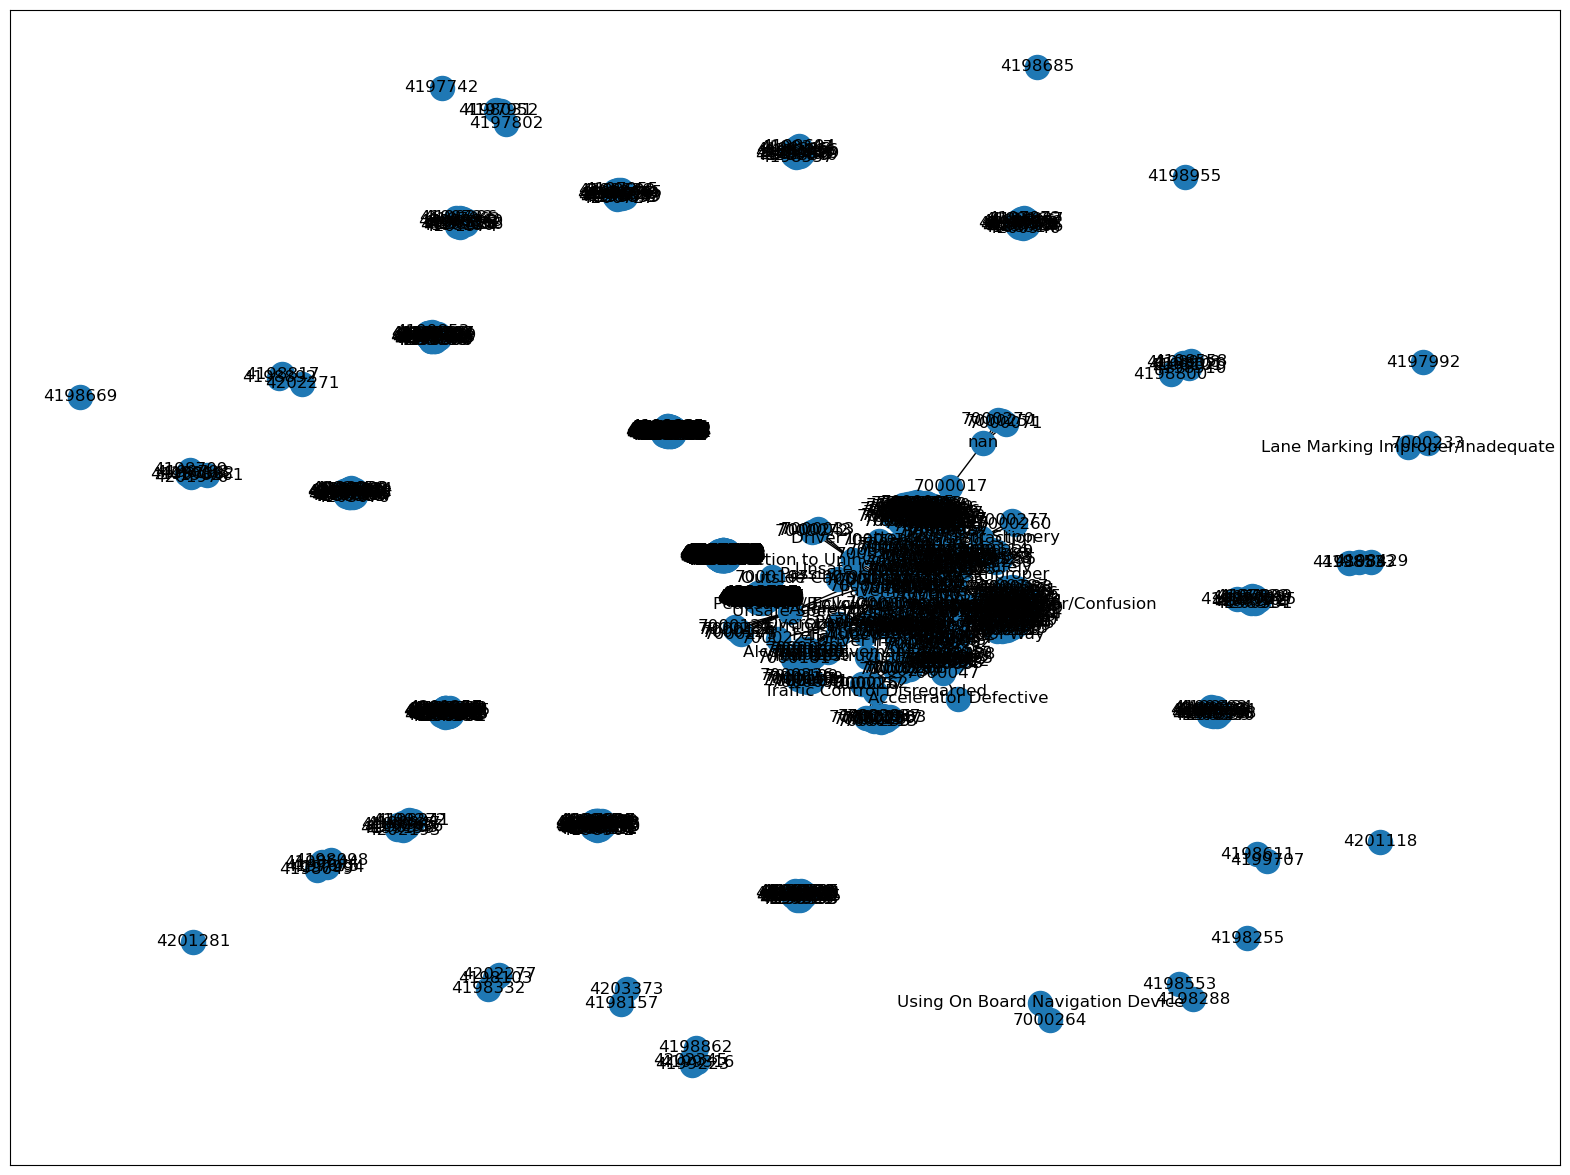

In [23]:
#Plotting the graph
plt.figure(figsize=(20,15))
nx.draw_networkx(G)
plt.show()

When looking at the results, the eigenvector scores seem to be either high or low, relative to where an accident took place.

In [38]:
cf = pd.DataFrame()
cf['eig_centrality'] = nx.eigenvector_centrality(G).values()
cf['deg_centrality'] = nx.degree_centrality(G).values()
cf['bet_centrality'] = nx.betweenness_centrality(G).values()
cf['clo_centrality'] = nx.closeness_centrality(G).values()
cf.index = list(G)
cf

,eig_centrality,deg_centrality,bet_centrality,clo_centrality
4198311,7.738232e-02,0.180043,0.000000,0.180043
4199346,2.243933e-05,0.144252,0.000000,0.144252
4199361,2.078603e-34,0.022777,0.000000,0.022777
4197802,2.002713e-66,0.002169,0.000000,0.002169
4198430,2.243933e-05,0.144252,0.000000,0.144252
...,...,...,...,...
Accelerator Defective,6.575631e-47,0.001085,0.000000,0.070705
Brakes Defective,1.132714e-45,0.002169,0.000749,0.090541
Pavement Slippery,8.891446e-46,0.003254,0.001496,0.084575
Lane Marking Improper/Inadequate,6.112828e-73,0.001085,0.000000,0.001085


## Analysis

After creating the graph, finally calculated the centrality measures for the nodes in the graph. Eigenvector centrality is a measure of centrality that takes into account the relative "influence" of neighboring nodes when determining the influence of any given node. This means that it isn't about the # of connections a given node has, but the connections a given node has to well connected nodes. A high eigenvector score means being connected to more influential nodes.

Degree Centrality is simply a measure of the number of "degrees" a node has. A degree is an outside connection (an edge, linking the node to another node).